# Diabetes Prediction for K Nearest Neighbors

DATA COLLECTION

In [2]:

import pandas as pd
# Used for data manipulation and analysis, particularly for handling data in tabular format (DataFrames).
import numpy as np
# Used for numerical operations, especially for working with arrays and matrices.
import matplotlib.pyplot as plt
 # Used for creating static, interactive, and animated visualizations in Python.
import seaborn as sns
 # Built on top of Matplotlib, provides a high-level interface for creating informative and attractive statistical graphics.
from sklearn.model_selection import train_test_split
# Used to split datasets into training and testing sets, essential for evaluating machine learning models.
from sklearn.neighbors import KNeighborsClassifier
# Implementation of the K-Nearest Neighbors algorithm for classification tasks.
from sklearn.metrics import confusion_matrix
# Used to evaluate the performance of classification models by creating a confusion matrix.
from sklearn import metrics
# Provides various metrics for evaluating the performance of machine learning models.
import warnings
# Used to manage warnings that may arise during code execution.
warnings.filterwarnings('ignore')
 # Ignores warnings to suppress potential warning messages that might clutter the output.


# Import Dataset

In [3]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Describe the datset

In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Count: The number of non-missing values in each column.
# Mean: The average value of each column.
# Std: The standard deviation, a measure of how spread out the values are.
# Min: The minimum value in each column.
# 25%: The first quartile (25th percentile), the value below which 25% of the data falls.
# 50%: The median (50th percentile), the middle value of the data.
# 75%: The third quartile (75th percentile), the value below which 75% of the data falls.
# Max: The maximum value in each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Data Preprocessing


In [ ]:
# Check the Null values in dataset

In [7]:
data.isnull().any()
# function is used to detect missing values in a DataFrame.

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [8]:
data.isnull().any().sum()

0

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
data.duplicated().sum()

3854

In [11]:
data.shape

(100000, 9)

In [ ]:
# Here we have 3854 duplicate values

In [ ]:
# we can drop the duplicate values

In [12]:
data1 = data.drop_duplicates()

In [13]:
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# We can see that other as gender
# Re-check if it was deleted properly

In [15]:
# Remove Unneccessary value
data1 = data1[data1['gender'] != 'Other']

In [16]:
data1['gender'].unique()

array(['Female', 'Male'], dtype=object)

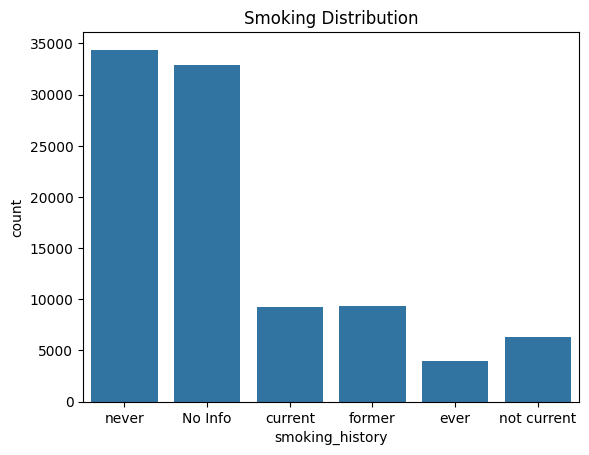

In [17]:
sns.countplot(x='smoking_history', data=data1)
plt.title('Smoking Distribution')
plt.show()

In [18]:
data1['gender'] = data1['gender'].map({"Female": 2, "Male": 1})

In [ ]:
# For EDA Analysis we change male to 1 and Female 2

In [19]:
data1['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,'not current': 6, 'ever': 7}, inplace=True)

In [ ]:
# Applying data analysis to a data set.

In [20]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,2,25.19,6.6,140,0
1,2,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,2,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0


In [21]:
data1['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [ ]:
# There are People suffering with Diabetes : 8484
# No Diabetes People : 87646

In [22]:
correlation = data1.corr()
correlation['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.424366
HbA1c_level            0.406446
age                    0.264918
bmi                    0.214951
hypertension           0.195696
heart_disease          0.170701
smoking_history        0.057830
gender                -0.037837
Name: diabetes, dtype: float64

In [23]:
data1.drop("gender",axis=1)
data1.drop("smoking_history",axis=1)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,25.19,6.6,140,0
1,2,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,2,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99994,2,36.0,0,0,24.60,4.8,145,0
99996,2,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,2,24.0,0,0,35.42,4.0,100,0


In [24]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# Correlation analysis
#corr_matrix = data.corr()
#plt.figure(figsize=(8, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()



In [ ]:
# gender col is excluded from the column because it is difficult to see a correlation with diabetes.

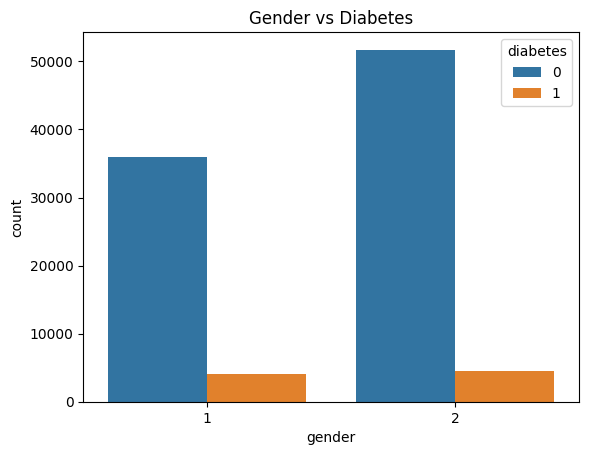

In [25]:
sns.countplot(x='gender', hue='diabetes', data=data1)
plt.title('Gender vs Diabetes')
plt.show()

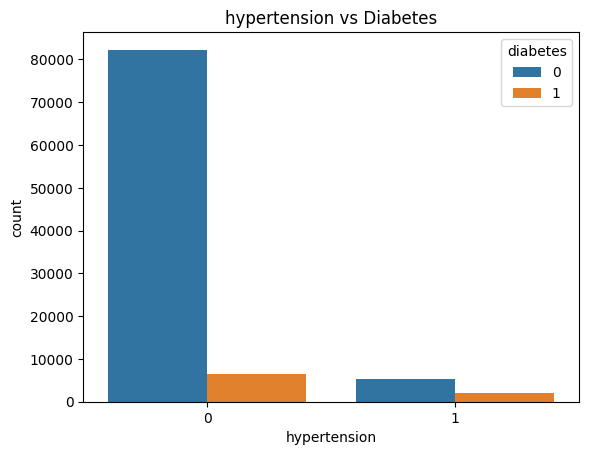

In [26]:
sns.countplot(x='hypertension', hue='diabetes', data=data1)
plt.title('hypertension vs Diabetes')
plt.show()

# MODEL TRAINING

In [ ]:
# libraries for Model Training

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
# Split the data into training and testing sets
training_points = data1.drop(columns=['diabetes'])
training_labels = data1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(
training_points,
training_labels,
test_size=0.1, #test_size=0.2 #Test dataset is 20% and training dataset is 80%
random_state=4) # random_state=4 ensures reproducibility of the split

print(X_train.shape) # training set of the predictor variables.
print(y_train.shape) # training set of the target variable.
print(X_test.shape) #  test set of the predictor variables.
print(y_test.shape) #  test set of the target variable.

(86515, 8)
(86515,)
(9613, 8)
(9613,)


In [34]:

# Make predictions on the test set
y_pred = knn.predict(X_test)
print(y_pred) # Predicted values of diabetes (0: No Diabetes, 1: Diabetes) for each sample in the test set.


[0 0 1 ... 0 1 0]


# MODEL EVALUATION

In [ ]:
# Libraries for Model Evaluation
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

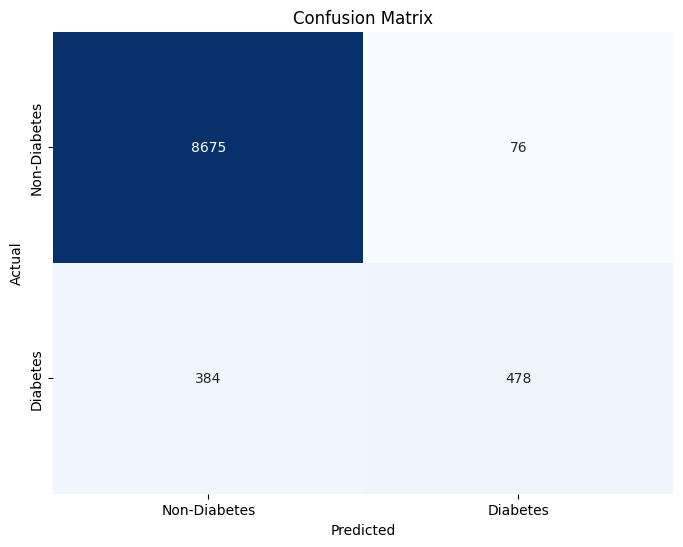

In [ ]:
# Model Evaluation

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# [[8728  37]
#  [ 773  71]]
# True Negative (Top-Left): 8728 instances correctly predicted as not having diabetes.
# False Positive (Top-Right): 37 instances incorrectly predicted as having diabetes when they don't.
# False Negative (Bottom-Left): 773 instances incorrectly predicted as not having diabetes when they do.
# True Positive (Bottom-Right): 71 instances correctly predicted as having diabetes.

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # 0.9151802656546489
# Overall percentage of correct predictions. (TP + TN) / (TP + TN + FP + FN)

precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision) # 0.6574074074074074
# Proportion of true positives out of all instances predicted as positive. TP / (TP + FP)

Accuracy: 0.9521481327369188
Precision: 0.8628158844765343


In [32]:
# Calculate recall
recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)
# Recall is the ability of a model to find all the relevant cases within a dataset.
# The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives.

# Calculate F1-score
f1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score:", f1_score)
# The F1 score is a metric that combines precision and recall into a single number.
# It is calculated as the harmonic mean of precision and recall, meaning it gives more weight to the lower of the two values.
# This makes it a good metric to use when you want to balance precision and recall.

Recall: 0.5545243619489559
F1 Score: 0.6751412429378532


[0.9377925725579944, 0.9507957973577447, 0.9479871008009987, 0.9516280037449287, 0.9521481327369188, 0.9521481327369188, 0.9528763133257048, 0.9528763133257048, 0.9531883907208988, 0.9522521585353168, 0.9526682617289087, 0.9512119005513368, 0.9516280037449287, 0.9512119005513368, 0.9522521585353168, 0.9505877457609487, 0.9515239779465308, 0.9501716425673568, 0.9506917715593467, 0.9501716425673568, 0.9501716425673568, 0.9498595651721627, 0.9500676167689587, 0.9497555393737647, 0.9497555393737647, 0.9489233329865807, 0.9495474877769687, 0.9491313845833766, 0.9493394361801727, 0.9489233329865807, 0.9489233329865807, 0.9490273587849787, 0.9487152813897847, 0.9486112555913867, 0.9488193071881826, 0.9485072297929886, 0.9486112555913867, 0.9480911265993966, 0.9482991781961927, 0.9477790492042026, 0.9478830750026006, 0.9472589202122126, 0.9475709976074066, 0.9470508686154167, 0.9471548944138146, 0.9470508686154167, 0.9473629460106107, 0.9474669718090086, 0.9475709976074066]


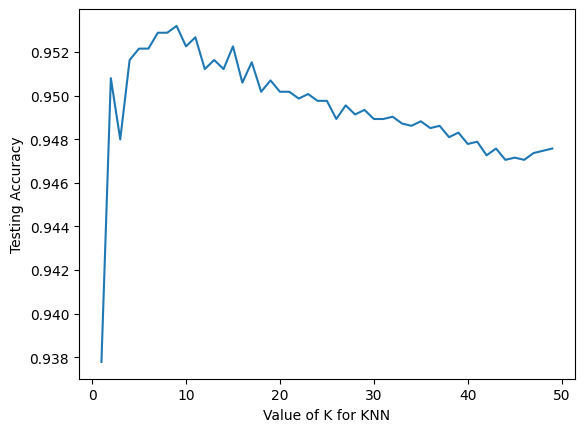

In [ ]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
 classifier = KNeighborsClassifier(n_neighbors = k)
 classifier.fit(X_train, y_train)
 guesses = classifier.predict(X_test)
 accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Training the KNN model with best parameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
precision = precision_score(y_test,y_pred)

In [ ]:
recall = recall_score(y_test, y_pred)

In [ ]:
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion_matrix:",conf_matrix)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
class_report = classification_report(y_test,y_pred)
print('Classification Report:')
print(class_report)